In [1]:
from rdkit import Chem
sys.path.insert(1, '/home/sabsr3/xchem/fragment_network_merges/scripts')
from FindMerges import *
from DescriptorFilter import *
from EmbeddingFilter import *
from OverlapFilter import *
import itertools

In [2]:
fragments = ['O=C(CC1CCCCC1)Nc1cccnc1', 'Cc1ccncc1NC(=O)Cc1cccc(C#N)c1', 'c1ccncc1NC(=O)Cc1cccc(C#N)c1SSS']
names = ['x0678', 'x2572', 'test']

In [3]:
nodes = Nodes(fragments, names)

In [4]:
nodes.check_for_nodes()

2 of 3 fragments present in network


In [5]:
new_frags, new_names = nodes.filter_for_nodes()

1 fragments removed from list. 2 fragments remaining.


In [6]:
merge = Merge(new_frags, new_names)
df = merge.get_all_expansions()

Expanding fragment A: x0678 with synthons of fragment B: x2572
Found 53 synthons
Synthon 0: found 267 expansions
Synthon 1: found 176 expansions
Synthon 2: found 0 expansions
Synthon 3: found 0 expansions
443 expansions from 2 out of 53 synthons

Expanding fragment A: x2572 with synthons of fragment B: x0678
Found 8 synthons
Synthon 0: found 8 expansions
Synthon 1: found 0 expansions
Synthon 2: found 4 expansions
Synthon 3: found 22 expansions
34 expansions from 3 out of 8 synthons



In [7]:
df

,Merge,Fragment A ID,Fragment A smiles,Fragment B ID,Fragment B smiles,Synthon,Smiles
0,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,CC(=O)N[Xe],CC(=O)Nc1c2ccccc2nc2ccccc12
1,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,CC(=O)N[Xe],CC(=O)NC12CC3CC(C1)C(=NO)C(C3)C2
2,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,CC(=O)N[Xe],CC(=O)Nc1ncccc1NC(=O)Cn1cccn1
3,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,CC(=O)N[Xe],CC(=O)Nc1ccc2c(c1)nc1n2CCOC1
4,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,CC(=O)N[Xe],CC(=O)NC1CCC(NC(=O)c2ccccn2)CC1
...,...,...,...,...,...,...,...
472,x2572_x0678,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,x0678,O=C(CC1CCCCC1)Nc1cccnc1,O=C(C[Xe])N[Xe],N#Cc1ccc(CC(=O)Nc2ccc(Cc3ccncc3)cc2)cc1
473,x2572_x0678,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,x0678,O=C(CC1CCCCC1)Nc1cccnc1,O=C(C[Xe])N[Xe],N#Cc1ccc(NC(=O)Cc2cccnc2)cc1
474,x2572_x0678,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,x0678,O=C(CC1CCCCC1)Nc1cccnc1,O=C(C[Xe])N[Xe],N#Cc1cccc(CC(=O)Nc2ccccn2)c1
475,x2572_x0678,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,x0678,O=C(CC1CCCCC1)Nc1cccnc1,O=C(C[Xe])N[Xe],N#Cc1ccc(CC(=O)Nc2ccncc2)cc1


In [8]:
new_df = DescriptorFilterDf(df).filter_df()

Removed 11 compounds. 466 remaining.


In [9]:
path = '/home/sabsr3/xchem/fragment_network_merges/data/Mpro/aligned/Mpro-FRAG_0A/Mpro-FRAG_0A.mol'

def get_filepaths(frag):
    return path.replace('FRAG', frag)

new_df['Fragment A file'] = new_df.apply(lambda x: get_filepaths(x['Fragment A ID']), axis=1)
new_df['Fragment B file'] = new_df.apply(lambda x: get_filepaths(x['Fragment B ID']), axis=1)

In [10]:
embedding = ConstrainedEmbeddingDf(new_df)
filtered = embedding.filter_df()

Running embedding
466it [00:07, 61.18it/s]
2it [00:00, 17.57it/s]/n
Running energy calculation (and unconstrained embedding)
/n
6it [00:00, 14.96it/s]Number of embedded compounds: 6



,Merge,Fragment A ID,Fragment A smiles,Fragment B ID,Fragment B smiles,Synthon,Smiles,Molecules,Synthon molecules,Fragment A file,Fragment B file,Embedded
0,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,CC(=O)N[Xe],CC(=O)NC1CCC(=NNC(=O)OC(C)(C)C)CC1,,,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,
1,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,CC(=O)N[Xe],CC(=O)Nc1ccc2c(c1)C1CCN2CC1,,,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,
2,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,CC(=O)N[Xe],CC(=O)Nc1ccc2[nH]c3ccccc3c2c1,,,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,
3,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,CC(=O)N[Xe],CC(=O)NC1CCc2[nH]c3ccccc3c2C1,,,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,
4,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,Cc1ccncc1NC(=O)C[Xe],Cc1ccncc1NC(=O)CN1CCCC1,,,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,
5,x0678_x2572,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,Cc1ccncc1NC(=O)C[Xe],Cc1ccncc1NC(=O)Cn1ccc2ccccc21,,,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,

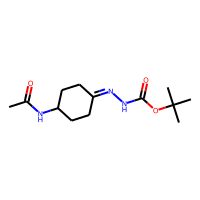
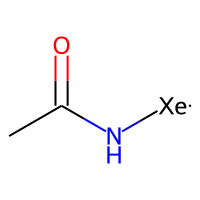
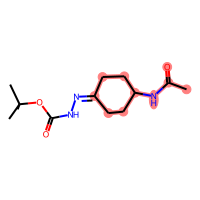
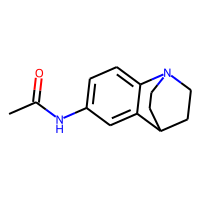
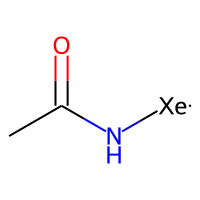
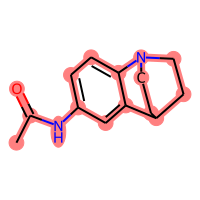
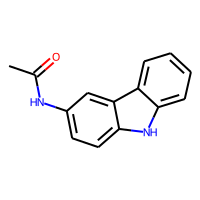
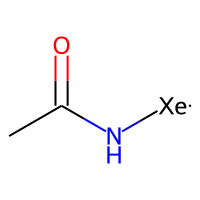
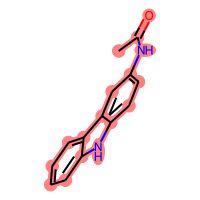
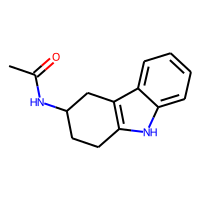
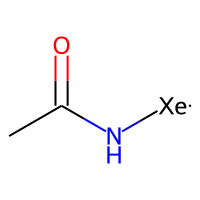
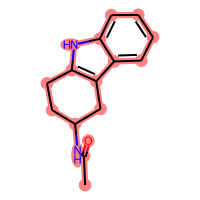
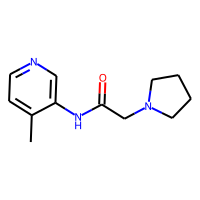
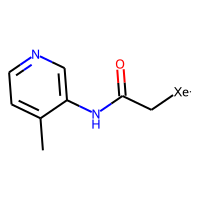
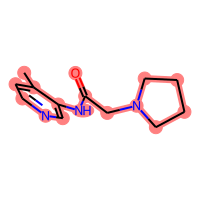
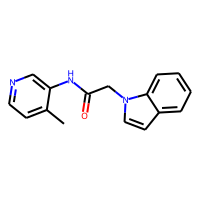
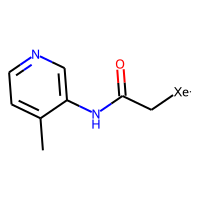
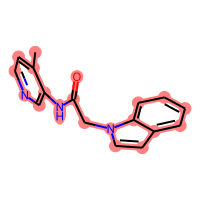

In [11]:
filtered

In [12]:
OverlapFilterDf(filtered, proteinsCol='Fragment B file').fixed_cutoff_filter()

ArgumentError: Python argument types in
    rdkit.Chem.rdShapeHelpers.ShapeProtrudeDist(Mol, NoneType)
did not match C++ signature:
    ShapeProtrudeDist(RDKit::ROMol mol1, RDKit::ROMol mol2, int confId1=-1, int confId2=-1, double gridSpacing=0.5, RDKit::DiscreteValueVect::DiscreteValueType bitsPerPoint=rdkit.DataStructs.cDataStructs.DiscreteValueType.TWOBITVALUE, double vdwScale=0.8, double stepSize=0.25, int maxLayers=-1, bool ignoreHs=True, bool allowReordering=True)

In [ ]:
path = '/home/sabsr3/xchem/fragment_network_merges/data/Mpro/aligned/Mpro-FRAG_0A/Mpro-FRAG_0A.mol'

def get_filepaths(frag):
    return path.replace('FRAG', frag)

new_df['Fragment A protein file'] = new_df.apply(lambda x: get_filepaths(x['Fragment A ID']), axis=1)
new_df['Fragment B protein file'] = new_df.apply(lambda x: get_filepaths(x['Fragment B ID']), axis=1)